In [1]:
# ! pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
# This gives the Shape of Database
# howmany rows and columns are present in Database
df.shape


(299, 7)

In [5]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02
mean,24.884415,25.456656,24.197558,24.801706,24.801706,1.487602e+06
std,3.929456,4.024589,3.839748,3.926058,3.926058,1.926408e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,21.220000,21.860000,20.745000,21.220000,21.220000,6.624000e+05
50%,24.740000,25.260000,24.020000,24.709999,24.709999,9.863000e+05
75%,27.695001,28.290000,27.085000,27.649999,27.649999,1.565400e+06
max,35.869999,36.419998,34.750000,35.470001,35.470001,1.876630e+07


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       299 non-null    object 
 1   Open       299 non-null    float64
 2   High       299 non-null    float64
 3   Low        299 non-null    float64
 4   Close      299 non-null    float64
 5   Adj Close  299 non-null    float64
 6   Volume     299 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


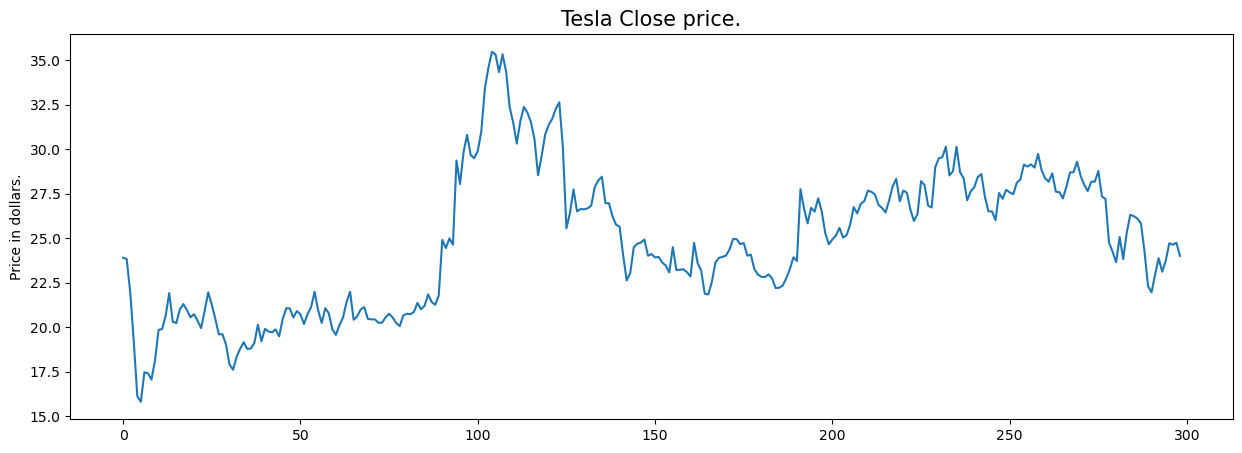

In [7]:
# Exploratory Data Analysis

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [8]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
# First of all by looking we assume that Close and Adj Close column are Same
# So let's Check it

df[df['Close'] == df['Adj Close']].shape


(299, 7)

In [10]:
# Drop redundant Column

df = df.drop(['Adj Close'], axis=1)


In [11]:
# Check if there are any NULL value present in Database

df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

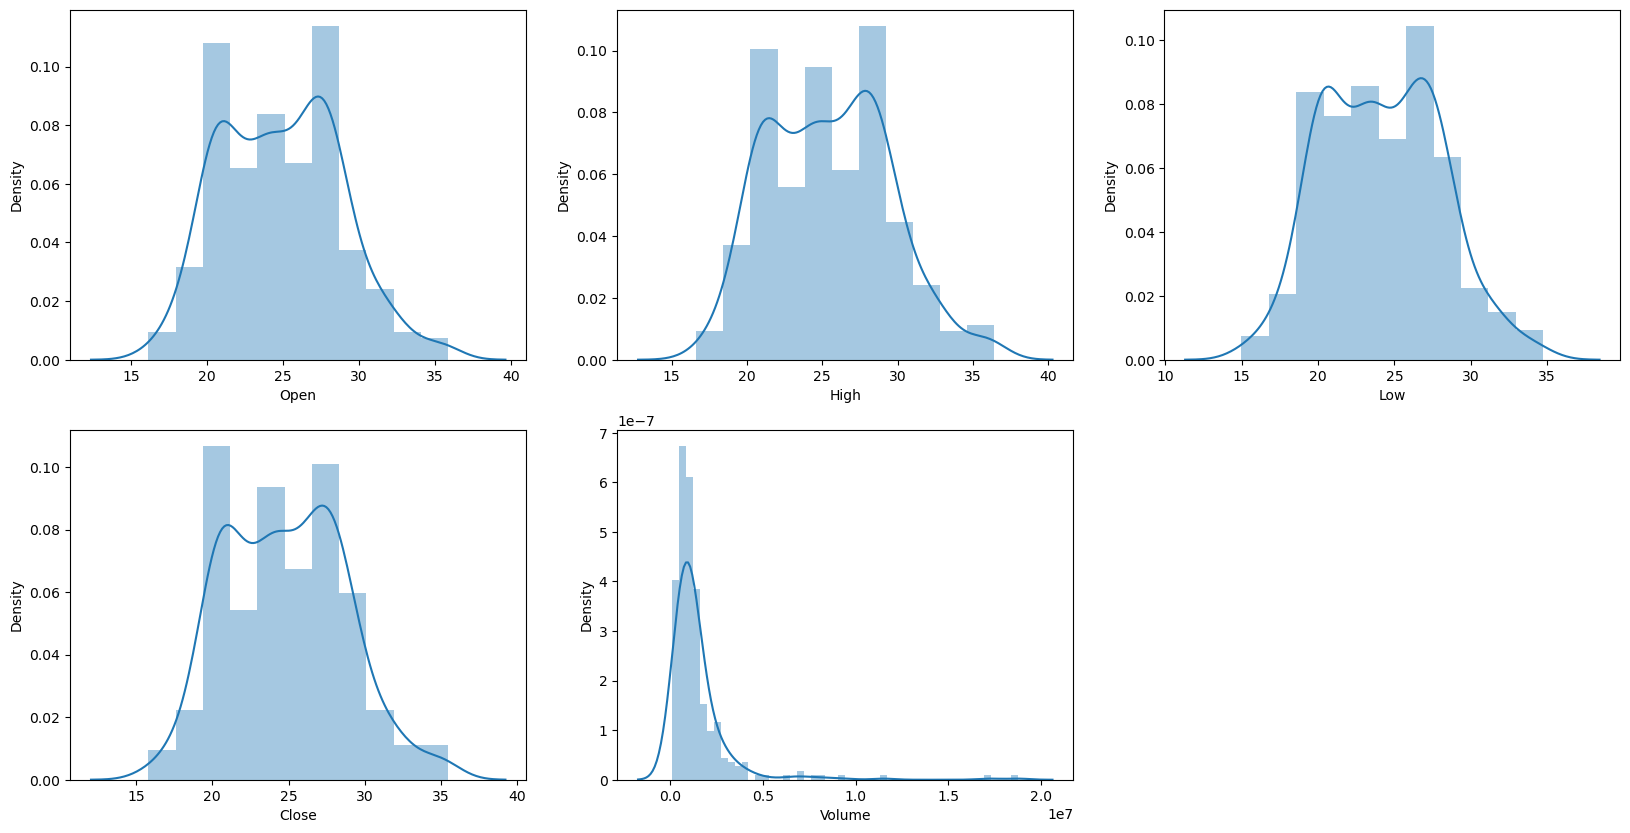

In [12]:
# Distribution Plot

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


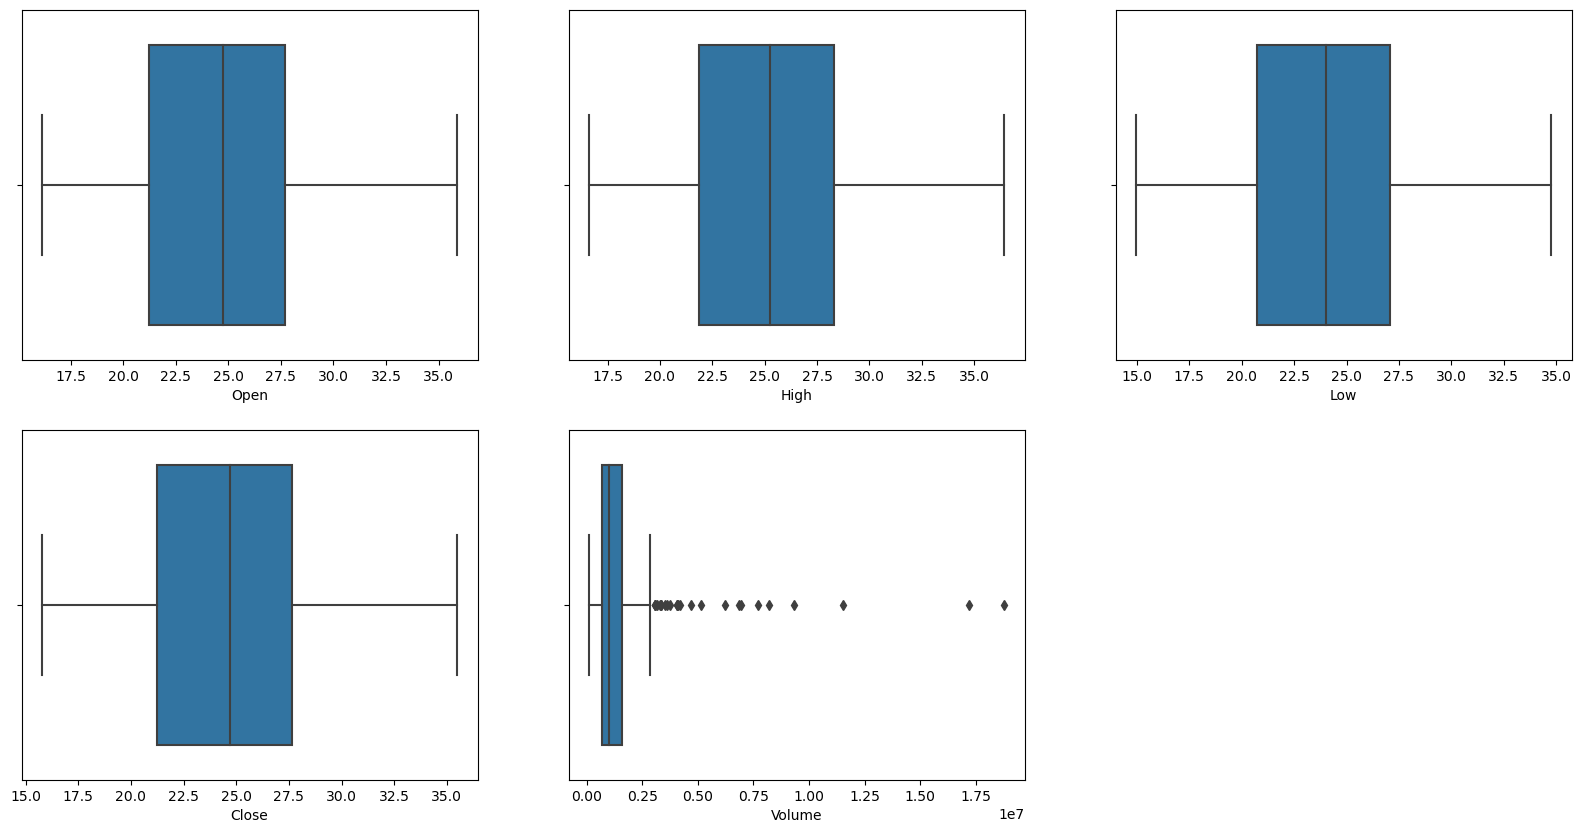

In [13]:
# BoxPlot

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [33]:
# Here we expand Date column in other Three Parts
# Day, Month, Year

splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


In [66]:
# Here We Analize the Data for Quarter Time

df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


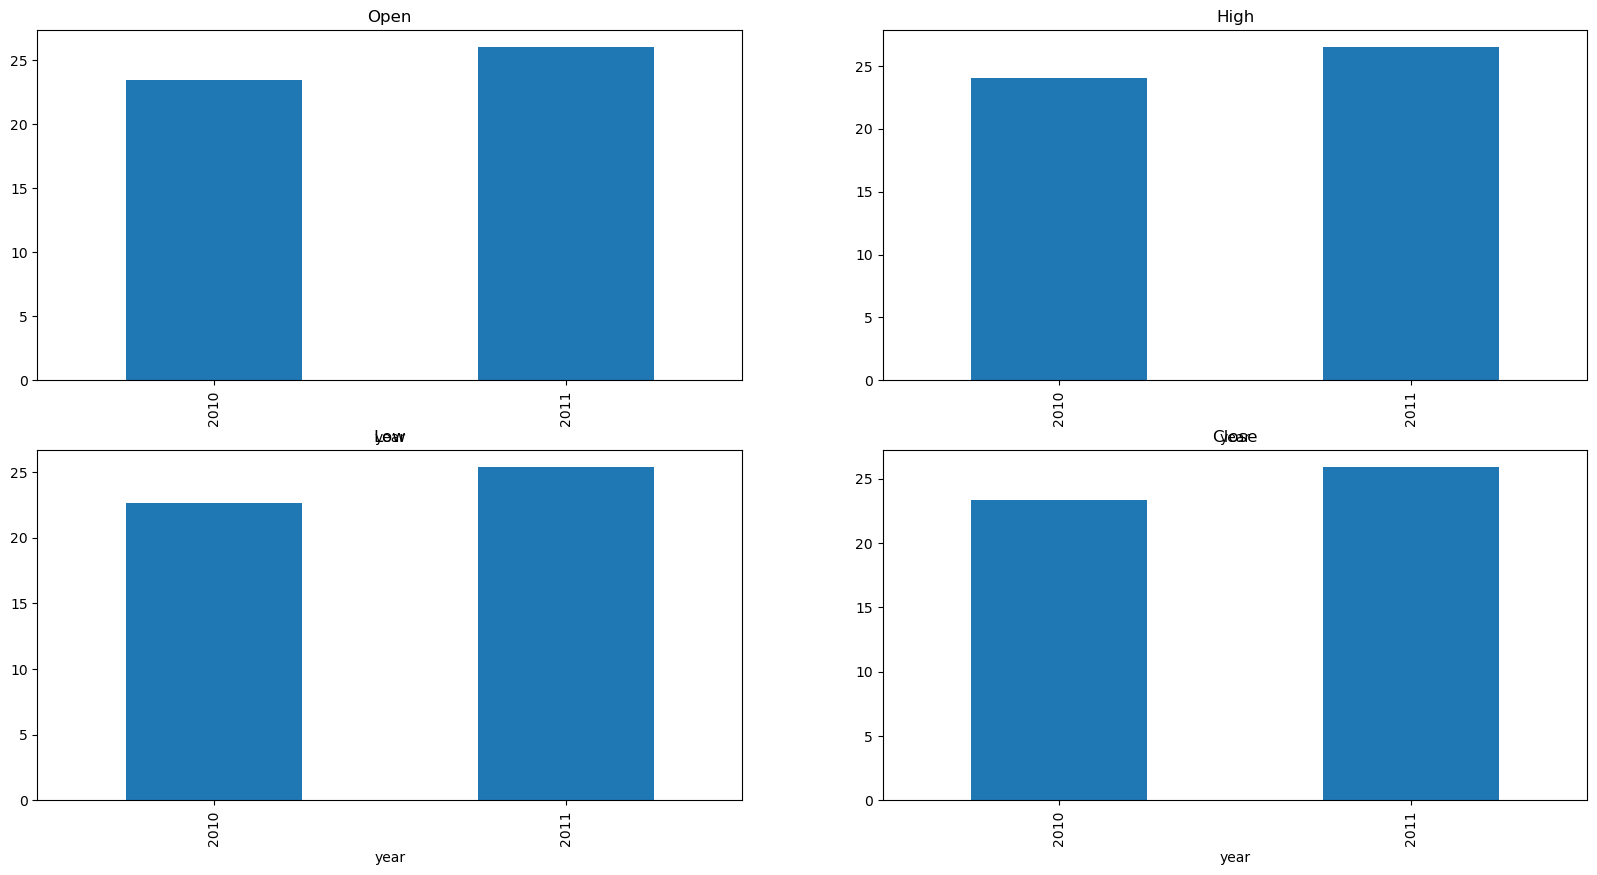

In [64]:
data_grouped = df.groupby(['year']).mean()

plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [17]:
df.groupby(['is_quarter_end']).mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,24.511106,25.054615,23.826154,24.439135,1.349817e+06,15.538462,6.399038,2010.591346
1,25.737692,26.375604,25.046483,25.630439,1.802537e+06,16.087912,7.417582,2010.505495


In [67]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


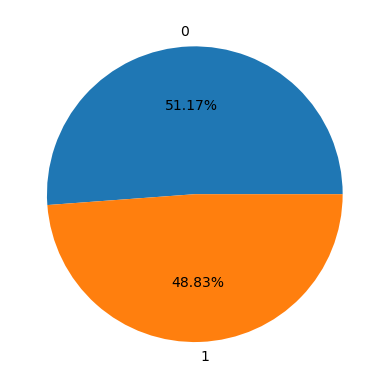

In [68]:
plt.pie(df['target'].value_counts().values,
    labels=[0, 1], autopct='%1.2f%%')
plt.show()


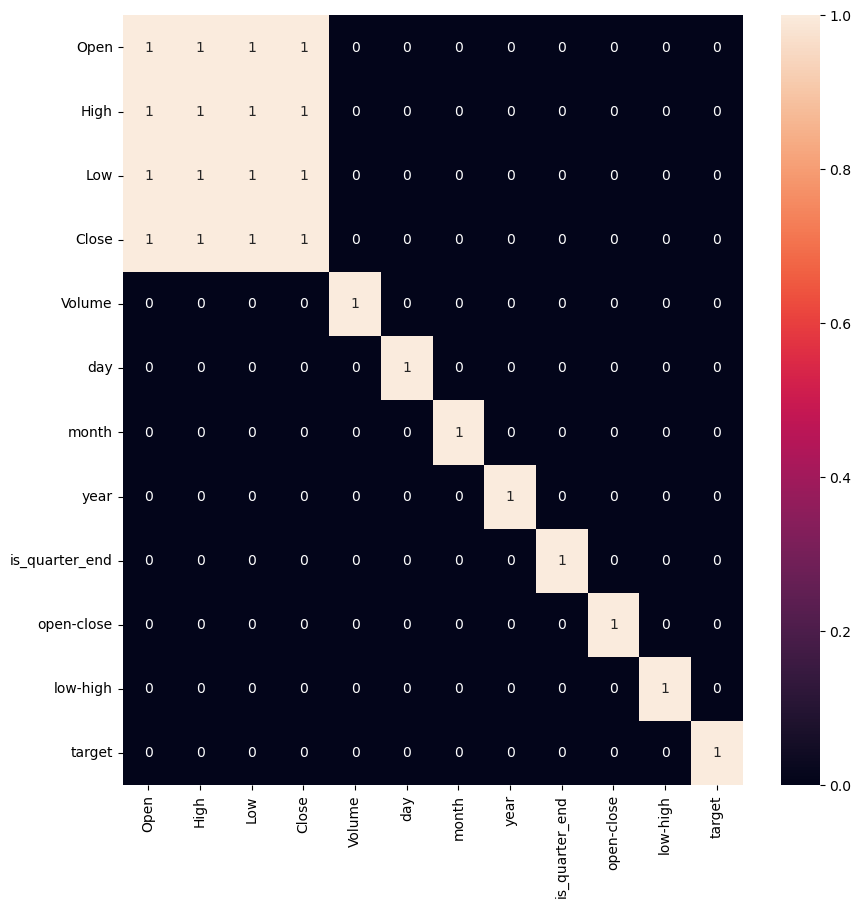

In [73]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=True)
plt.show()


# Linear Regression Model

Mean Squared Error for Model is shown below
0.8269743145550795
Weights:  [0.96948768]
Intercept:  0.6475070707832842


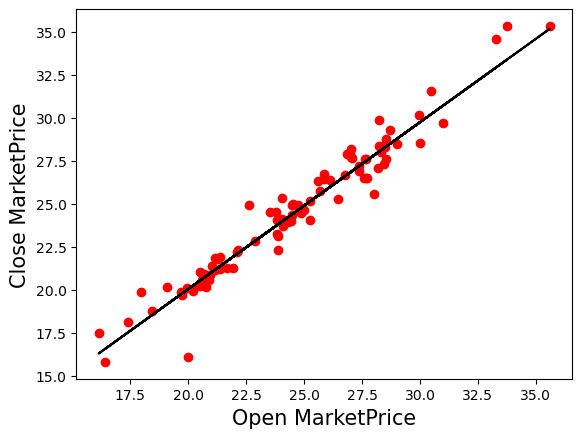

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df.iloc[:, 1].values.reshape(-1, 1)
Y = df['Close']

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)

model = linear_model.LinearRegression()

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

print("Mean Squared Error for Model is shown below")
print(mean_squared_error(y_test,y_predict))

print("Weights: ",model.coef_)
print("Intercept: ", model.intercept_)

plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,y_predict,color='black')
plt.xlabel("Open MarketPrice",fontsize=15)
plt.ylabel("Close MarketPrice",fontsize=15)
plt.show()

# KNN (K- nearest neighbors) Algorithm Implementation

              precision    recall  f1-score   support

      141000       0.00      0.00      0.00       0.0
      162800       0.00      0.00      0.00       0.0
      171200       0.00      0.00      0.00       0.0
      201100       0.00      0.00      0.00       0.0
      244000       0.00      0.00      0.00       0.0
      280600       0.00      0.00      0.00       1.0
      288400       0.00      0.00      0.00       0.0
      296000       0.00      0.00      0.00       0.0
      313400       0.00      0.00      0.00       0.0
      322500       0.00      0.00      0.00       0.0
      350600       0.00      0.00      0.00       1.0
      356500       0.00      0.00      0.00       1.0
      360800       0.00      0.00      0.00       1.0
      366200       0.00      0.00      0.00       1.0
      379600       0.00      0.00      0.00       0.0
      406000       0.00      0.00      0.00       0.0
      410400       0.00      0.00      0.00       0.0
      411700       0.00    

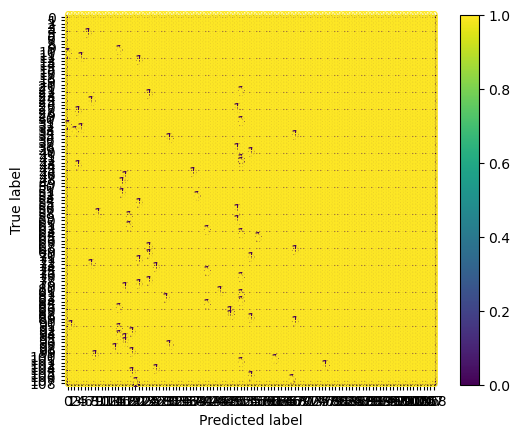

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


X = df.iloc[:,[1,2,3,4]].values
Y = df['Volume']

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.25)

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

cl = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
cl = cl.fit(x_train,y_train)

y_pred = cl.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
#print(cm)
display = ConfusionMatrixDisplay(cm)
display.plot()
print(classification_report(y_test,y_pred))